In [1]:
#import the necessary packages
import numpy as np
import os
import cv2
import keras

from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

KeyboardInterrupt: 

In [2]:
np.random.seed(143)

In [3]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [4]:
directory = 'cifar10/'
SIZE = 64

In [5]:
#initialize a lists
dataset = []
label = []

In [6]:
#for class airplane
airplane = os.listdir(directory + 'airplane/')
for i, image_name in enumerate(airplane):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'airplane/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


In [7]:
#for class automobile
automobile = os.listdir(directory + 'automobile/')
for i, image_name in enumerate(automobile):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'automobile/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


In [8]:
#for class bird
bird = os.listdir(directory + 'bird/')
for i, image_name in enumerate(bird):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'bird/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)

In [9]:
#for class cat
cat = os.listdir(directory + 'cat/')
for i, image_name in enumerate(cat):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'cat/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(3)

In [10]:
#for class deer
deer = os.listdir(directory + 'deer/')
for i, image_name in enumerate(deer):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'deer/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(4)

In [11]:
#for class dog
dog = os.listdir(directory + 'dog/')
for i, image_name in enumerate(dog):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'dog/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(5)

In [12]:
#for class frog
frog = os.listdir(directory + 'frog/')
for i, image_name in enumerate(frog):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'frog/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(6)

In [13]:
#for class horse
horse = os.listdir(directory + 'horse/')
for i, image_name in enumerate(horse):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'horse/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(7)

In [14]:
#for class ship
ship = os.listdir(directory + 'ship/')
for i, image_name in enumerate(ship):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'ship/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(8)

In [15]:
#for class truck
truck = os.listdir(directory + 'truck/')
for i, image_name in enumerate(truck):
    if (image_name.split(".")[1] == 'png'):
        image = cv2.imread(directory + 'truck/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(9)

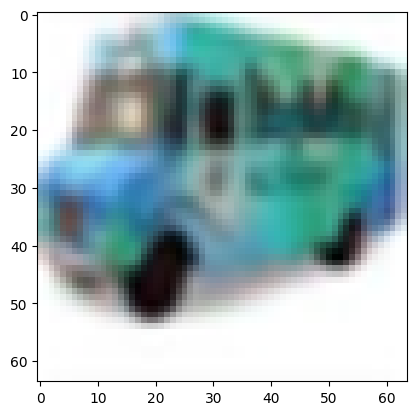

In [16]:
plt.imshow(np.array(dataset[54000]))

In [17]:
INPUT_SHAPE = (SIZE, SIZE, 3)

inp = keras.layers.Input(shape=INPUT_SHAPE)
conv1 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

dense1 = keras.layers.Dense(units=512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(dense1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

dense2 = keras.layers.Dense(units=512, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(dense2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

dense3 = keras.layers.Dense(units=512, activation='relu')(drop4)
norm5 = keras.layers.BatchNormalization(axis=-1)(dense3)
drop5 = keras.layers.Dropout(rate=0.2)(norm5)


out = keras.layers.Dense(units=10, activation='softmax')(drop5)

In [18]:
model = keras.Model(inputs=inp, outputs=out)

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,741,802 (18.09 MB)

 Trainable params: 4,738,602 (18.08 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset), to_categorical(np.array(label)), test_size=0.2, random_state=0)

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=100, validation_split=0.1, shuffle=False)

Epoch 1/2
675/675 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.3850 - loss: 1.8696 - val_accuracy: 0.5500 - val_loss: 1.2451
Epoch 2/2
675/675 ━━━━━━━━━━━━━━━━━━━━ 63s 93ms/step - accuracy: 0.5876 - loss: 1.1658 - val_accuracy: 0.5827 - val_loss: 1.2324


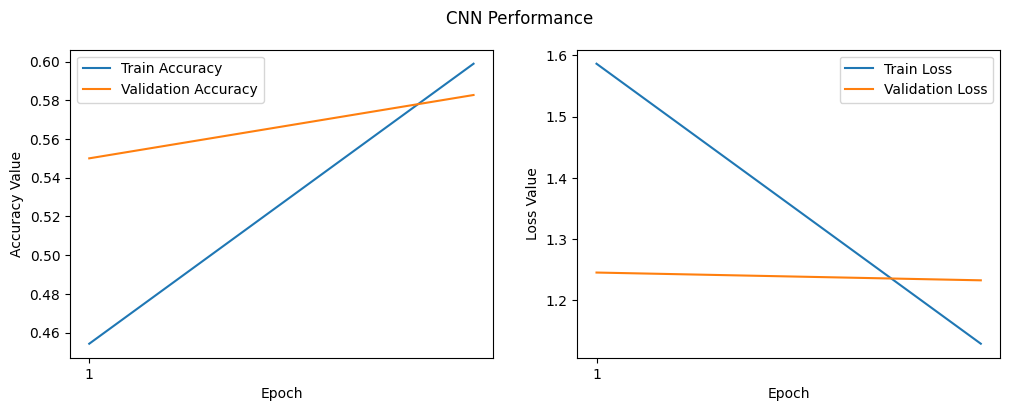

In [23]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
t = f.suptitle("CNN Performance")
max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel("Accuracy Value")
ax1.set_xlabel("Epoch")
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel("Loss Value")
ax2.set_xlabel("Epoch")
l2 = ax2.legend(loc="best")

In [ ]:
eval = model.evaluate(X_test, y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6066 - loss: 1.1586


In [25]:
print("Model Accuracy: ", eval[1])
print("Model Loss: ", eval[0])

Model Accuracy:  0.6025000214576721
Model Loss:  1.1633143424987793


In [26]:
model.save(os.path.expanduser('~/Desktop/cifar_cnn.h5'))